#### import thư viện cần thiết

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Tải tập data train với data test

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data4.txt to data4.txt
Saving data3.txt to data3.txt
Saving data2.txt to data2.txt


Đọc dữ liệu từ data train

In [3]:
data = np.loadtxt('data2.txt', delimiter=',', dtype=float)

Phân biệt 2 dòng dữ liệu

In [4]:
data.shape

(71115, 2)

In [5]:
# Kích cỡ của chương trình (byte)
X = data[:, 0]
# Thời gian chạy của chương trình (s)
y = data[:, 1]

Vẽ lên biểu đồ

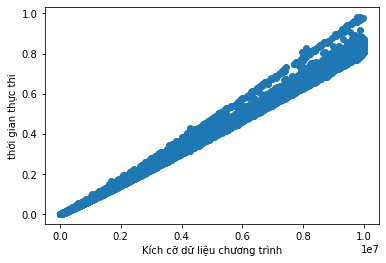

In [6]:
plt.scatter(X, y)
plt.xlabel("Kích cỡ dữ liệu chương trình")
plt.ylabel("thời gian thực thi")
plt.show()

Em thấy được kích cỡ dữ liệu chương trình càng lớn thì thời gian thực thi của chương trình càng lớn

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X.reshape(-1, 1), y)

LinearRegression()

In [20]:
y_pred = linear_reg.predict(X.reshape(-1, 1))

In [21]:
from sklearn.metrics import r2_score

r2_score(y, y_pred)

0.9975924993345858

r2_score đánh giá y_predict so với với y_true

r2_score được tính bằng: score = 1 - u/v

trong đó:
- u là tổng các độ lệch bình phương ( Tổng các (y_true - y_predict)**2 )
- v là tổng độ lệch bình phương của toàn bộ các sample ( (y_true - y_true.mean**2 )

kết quả r2 trong khoảng (-inf, 1]. càng gần 1 thì độ chính xác càng cao

In [24]:
print('coefficient: ',linear_reg.coef_)
print('intercept : ',linear_reg.intercept_)

coefficient:  [8.45569856e-08]
intercept :  -0.015895527000496068


phương trình đường thẳng dự đoán là: y = 8.45569856e-08 * X - 0.015895527000496068

vì kích thước dữ liệu quá lớn so với thời gian thực thi nên các trị số của phương trình đường thẳng rất nhỏ.

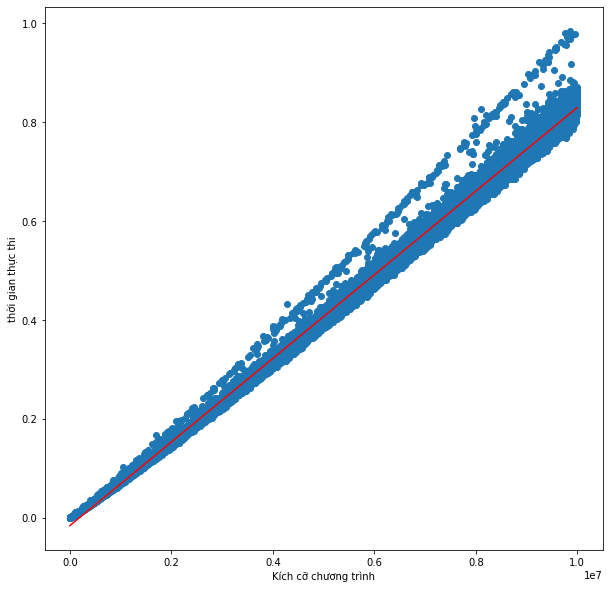

In [25]:
X_plot = np.array([200, 10000000])
y_plot = linear_reg.predict(X_plot.reshape(-1, 1))

plt.figure(figsize=(10, 10))
plt.scatter(X, y)
plt.plot(X_plot, y_plot, c='r')
plt.xlabel("Kích cỡ chương trình")
plt.ylabel("thời gian thực thi")
plt.show()

Sử dụng phương trình đường thẳng ban đầu để dự đoán các bộ dữ liệu "data3" và "data4"

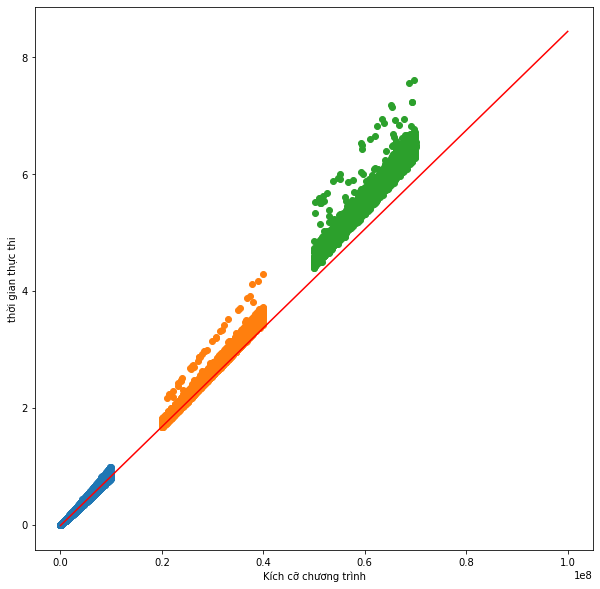

In [26]:
data_test1 = np.loadtxt('data3.txt', delimiter=',', dtype=float)
data_test2 = np.loadtxt('data4.txt', delimiter=',', dtype=float)

X_test1 = data_test1[:, 0]
y_test1 = data_test1[:, 1]
X_test2 = data_test2[:, 0]
y_test2 = data_test2[:, 1]

X_plot = np.array([200, 100000000])
y_plot = linear_reg.predict(X_plot.reshape(-1, 1))

plt.figure(figsize=(10, 10))
# tập train
plt.scatter(X, y)
# tập data3
plt.scatter(X_test1, y_test1)
# tập data4
plt.scatter(X_test2, y_test2)
# đường dự đoán của model linear_reg
plt.plot(X_plot, y_plot, c='r')
plt.xlabel("Kích cỡ chương trình")
plt.ylabel("thời gian thực thi")
plt.show()

In [27]:
r2_score(y_test1, linear_reg.predict(X_test1.reshape(-1, 1)))

0.9284132208349453

In [28]:
r2_score(y_test2, linear_reg.predict(X_test2.reshape(-1, 1)))

0.3156839605365861

Đánh giá r2 của đường thẳng này giảm rõ rệt khi dự đoán trên bộ dada3 và data4.

Do đó đề xuất vài hướng giải pháp để có thể dự đoán tốt hơn. Đầu tiên là loại bỏ data tới một ngưỡng nào nào đó. Thứ hai là sử dụng polynomial regression. Và tiếp theo là kết hợp cả 2.

#### hướng loại bỏ data

sắp xếp data theo thời gian thực thi từ nhỏ đến lớn. và loại bỏ dần dần các data nhỏ đi cho đến khi đạt kết quả tốt nhất

In [29]:
sorted_data = np.array(sorted(data, key=lambda x: x[1]))
sorted_data


array([[2.550000e+02, 8.601000e-06],
       [3.200000e+02, 1.065800e-05],
       [4.430000e+02, 1.731700e-05],
       ...,
       [9.949739e+06, 9.784270e-01],
       [9.767804e+06, 9.800350e-01],
       [9.866574e+06, 9.837760e-01]])

loại bỏ các data từ đầu đến i, i từ khoảng 1 đến 50000 nhảy mỗi bước là 100, để tìm ra kết quả tốt nhất

In [30]:
max_score_1 = 0
max_score_2 = 0
i_sample_remove_1 = 1
i_sample_remove_2 = 1

for i in range(1, 50000, 100):
  X_train = sorted_data[i:, 0]
  y_train = sorted_data[i:, 1]
  model = LinearRegression()
  model.fit(X_train.reshape(-1, 1), y_train)
  score_1 = r2_score(y_test1, model.predict(X_test1.reshape(-1, 1)))
  score_2 = r2_score(y_test2, model.predict(X_test2.reshape(-1, 1)))
  if score_1 > max_score_1:
    i_sample_remove_1 = i
    max_score_1 = score_1
  if score_2 > max_score_2:
    i_sample_remove_2 = i
    max_score_2 = score_2

print('score 1 tốt nhất là: ', max_score_1, '. Sau khi loại các phần từ đầu',i_sample_remove_1)
print('score 2 tốt nhất là: ', max_score_2, '. Sau khi loại các phần từ đầu',i_sample_remove_2)

score 1 tốt nhất là:  0.9682262768913524 . Sau khi loại các phần từ đầu 42901
score 2 tốt nhất là:  0.6217039283255559 . Sau khi loại các phần từ đầu 42901


giảm số bước nhảy xuống 10, đổi khoảng giá trị của i thành từ 30000 đến 70000

In [31]:
max_score_1 = 0
max_score_2 = 0
i_sample_remove_1 = 1
i_sample_remove_2 = 1

for i in range(30000, 70000, 10):
  X_train = sorted_data[i:, 0]
  y_train = sorted_data[i:, 1]
  model = LinearRegression()
  model.fit(X_train.reshape(-1, 1), y_train)
  score_1 = r2_score(y_test1, model.predict(X_test1.reshape(-1, 1)))
  score_2 = r2_score(y_test2, model.predict(X_test2.reshape(-1, 1)))
  if score_1 > max_score_1:
    i_sample_remove_1 = i
    max_score_1 = score_1
  if score_2 > max_score_2:
    i_sample_remove_2 = i
    max_score_2 = score_2

print('score 1 tốt nhất là: ', max_score_1, '. Sau khi loại các phần từ đầu',i_sample_remove_1)
print('score 2 tốt nhất là: ', max_score_2, '. Sau khi loại các phần từ đầu',i_sample_remove_2)

score 1 tốt nhất là:  0.9682551657606262 . Sau khi loại các phần từ đầu 42890
score 2 tốt nhất là:  0.621968885829858 . Sau khi loại các phần từ đầu 42890


giảm số bước nhảy xuống 1 và đổi khoảng giá trị i từ 40000 đến 50000

In [32]:
max_score_1 = 0
max_score_2 = 0
i_sample_remove_1 = 1
i_sample_remove_2 = 1

for i in range(40000, 50000, 1):
  X_train = sorted_data[i:, 0]
  y_train = sorted_data[i:, 1]
  model = LinearRegression()
  model.fit(X_train.reshape(-1, 1), y_train)
  score_1 = r2_score(y_test1, model.predict(X_test1.reshape(-1, 1)))
  score_2 = r2_score(y_test2, model.predict(X_test2.reshape(-1, 1)))
  if score_1 > max_score_1:
    i_sample_remove_1 = i
    max_score_1 = score_1
  if score_2 > max_score_2:
    i_sample_remove_2 = i
    max_score_2 = score_2

print('score 1 tốt nhất là: ', max_score_1, '. Sau khi loại các phần từ đầu',i_sample_remove_1)
print('score 2 tốt nhất là: ', max_score_2, '. Sau khi loại các phần từ đầu',i_sample_remove_2)

score 1 tốt nhất là:  0.9682738182420646 . Sau khi loại các phần từ đầu 42883
score 2 tốt nhất là:  0.622139907742429 . Sau khi loại các phần từ đầu 42883


Sau khi loại 42883 sample đầu tiên thì độ đánh giá r2 cao hơn rất nhiều nhưng vẫn chưa đủ chính xác.

#### hướng dùng polynomial regression

* đầu tiên thử công thức: \
(**công thức 1**)

y = 𝞱_1 * x + 𝞱_2 * x^2 + 𝞱_3 * sqrt(x) + 𝞱_4 * log(x) + 𝞱_5 * xlog(x) + 𝞱_0 


Đánh giá được:

Đánh giá r2 trên tập data3:  0.9830863275910554 \
Đánh giá r2 trên tập data4:  0.9351255460495257

* tiếp theo thử công thức: \
(**công thức 2**)

y = 𝞱_1 * x + 𝞱_2 * sqrt(x) + 𝞱_3 * log(x) + 𝞱_4 * sqrt(sqrt(x)) + 𝞱_5 * sqrt(x) * log(x) + 𝞱_0 


Đánh giá được:

Đánh giá r2 trên tập data3:  0.9875227004480762 \
Đánh giá r2 trên tập data4:  0.9500210308905487

* cuối cùng thử công thức: \
(**công thức 3**)

y = 𝞱_1 * x + 𝞱_2 * sqrt(sqrt(x)) + 𝞱_3 * sqrt(x) + 𝞱_4 * log(x) + 𝞱_5 * xlog(x) + 𝞱_0 

Đánh giá được: 

Đánh giá r2 trên tập data3:  0.9852075512126088 \
Đánh giá r2 trên tập data4:  0.9536999507355562

In [142]:
def poly_transform(X):
  # thử lần 1
  # X1 = X
  # X2 = np.sqrt(X)
  # X3 = np.log(X)
  # X4 = X ** 1/4
  # X5 = np.sqrt(X) * np.log(X)

  # thử lần 2
  # X1 = X
  # X2 = X * X
  # X3 = np.sqrt(X)
  # X4 = np.log(X)
  # X5 = X * np.log(X)

  # thử lần 3
  X1 = X
  X2 = X ** 1/4
  X3 = np.sqrt(X)
  X4 = np.log(X)
  X5 = X * np.log(X)

  new_X = np.array([X1, X2, X3, X4, X5])
  new_X = np.transpose(new_X)

  return new_X

In [131]:
poly_X = poly_transform(X)

poly_linear_reg = LinearRegression()
poly_linear_reg.fit(poly_X, y)

LinearRegression()

In [132]:
y_pred_poli_1 = poly_linear_reg.predict(poly_transform(X_test1))
y_pred_poli_2 = poly_linear_reg.predict(poly_transform(X_test2))

print('Đánh giá r2 trên tập data3: ', r2_score(y_test1, y_pred_poli_1))
print('Đánh giá r2 trên tập data4: ', r2_score(y_test2, y_pred_poli_2))

Đánh giá r2 trên tập data3:  0.9852075512126088
Đánh giá r2 trên tập data4:  0.9536999507355562


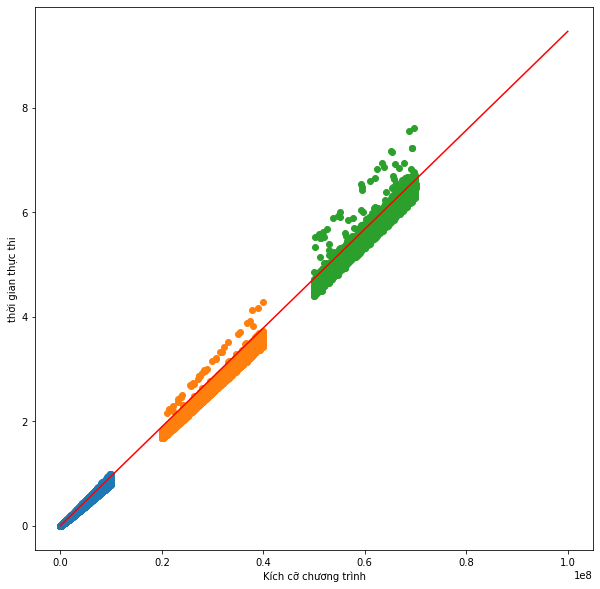

In [133]:
X_plot = np.array([200, 100000000])
y_plot = poly_linear_reg.predict(poly_transform(X_plot))

plt.figure(figsize=(10, 10))
# tập train
plt.scatter(X, y)
# tập data3
plt.scatter(X_test1, y_test1)
# tập data4
plt.scatter(X_test2, y_test2)
# đường dự đoán của model linear_reg
plt.plot(X_plot, y_plot, c='r')
plt.xlabel("Kích cỡ chương trình")
plt.ylabel("thời gian thực thi")
plt.show()

Khi sử dụng polynomial regression thì độ đánh giá r2 tăng lên đáng kể.

Sau khi thử nghiệm và thay đổi các công thức thì công thứ 2 và công thứ thứ 3 cho kết quả tốt nhất trong các công thức đã thử. Điểm đánh giá r2 của **công thức 2** trên bộ **data3** cao hơn, còn điểm đánh giá r2 của **công thức 3** trên bộ **data4** lại cao hơn

#### dùng cả 2 phương pháp trên

thử loại bỏ các data từ đầu đến i, i từ khoảng 1 đến 70000 nhảy mỗi bước là 1000

sử dụng công thức thứ 3

In [138]:
max_score_1 = 0
max_score_2 = 0
i_sample_remove_1 = 1
i_sample_remove_2 = 1

for i in range(0, 70000, 1000):
  X_train = sorted_data[i:, 0]
  y_train = sorted_data[i:, 1]
  model = LinearRegression()
  model.fit(poly_transform(X_train), y_train)
  score_1 = r2_score(y_test1, model.predict(poly_transform(X_test1)))
  score_2 = r2_score(y_test2, model.predict(poly_transform(X_test2)))
  # print(score_1, score_2)
  if score_1 > max_score_1:
    i_sample_remove_1 = i
    max_score_1 = score_1
  if score_2 > max_score_2:
    i_sample_remove_2 = i
    max_score_2 = score_2

print('score 1 tốt nhất là: ', max_score_1, '. Sau khi loại các phần từ đầu',i_sample_remove_1)
print('score 2 tốt nhất là: ', max_score_2, '. Sau khi loại các phần từ đầu',i_sample_remove_2)

score 1 tốt nhất là:  0.9852075512126087 . Sau khi loại các phần từ đầu 0
score 2 tốt nhất là:  0.9536999507355556 . Sau khi loại các phần từ đầu 0


thử với loại bỏ các giá trị thứ i, i từ 0 đến 1000, bước nhảy 1

vẫn dùng công thức 3

In [143]:
max_score_1 = 0
max_score_2 = 0
i_sample_remove_1 = 1
i_sample_remove_2 = 1

for i in range(0, 1000, 1):
  X_train = sorted_data[i:, 0]
  y_train = sorted_data[i:, 1]
  model = LinearRegression()
  model.fit(poly_transform(X_train), y_train)
  score_1 = r2_score(y_test1, model.predict(poly_transform(X_test1)))
  score_2 = r2_score(y_test2, model.predict(poly_transform(X_test2)))
  # print(score_1, score_2)
  if score_1 > max_score_1:
    i_sample_remove_1 = i
    max_score_1 = score_1
  if score_2 > max_score_2:
    i_sample_remove_2 = i
    max_score_2 = score_2

print('score 1 tốt nhất là: ', max_score_1, '. Sau khi loại các phần từ đầu',i_sample_remove_1)
print('score 2 tốt nhất là: ', max_score_2, '. Sau khi loại các phần từ đầu',i_sample_remove_2)

score 1 tốt nhất là:  0.9852955277092482 . Sau khi loại các phần từ đầu 222
score 2 tốt nhất là:  0.9539931205205119 . Sau khi loại các phần từ đầu 222


Sau khi kết hợp cả 2 phương pháp thì loại bỏ 222 phần tử có thời gian thực thi nhỏ nhất, cộng với việc sử dụng công thức thứ 3 cho ra kết quả tốt nhất